In [13]:
import nltk
import pandas as pd
import pickle

pd.set_option("display.max_columns", None)
from collections import Counter
import spacy
import google_conf
import math
import matplotlib
import matplotlib.pyplot as plt
import json

In [2]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [3]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [15]:
article_id = 1203  # id for "Paul the Cosmopolitan?"
with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    unigrams_lemmata = [el.strip() for el in f.readlines()]

In [16]:
nltk.FreqDist(unigrams_lemmata).most_common(10)

[('cosmopolitan', 89),
 ('Paul', 78),
 ('cosmopolitanism', 71),
 ('cynic', 41),
 ('vision', 33),
 ('people', 33),
 ('social', 33),
 ('human', 31),
 ('new', 30),
 ('think', 29)]

In [17]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]

In [ ]:
metadata_df["wordCount"]

In [22]:
def freqs_from_ids(ids):
    metadata_subset = metadata_df[metadata_df["id_kase"].isin(ids)]
    wordcount = metadata_subset["wordCount"].sum()
    unigrams_lemmata = []
    for id in ids:
        with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(id)), "r") as f:
            unigrams_lemmata.extend([el.strip() for el in f.readlines()])
    unigrams_lemmata_counts = nltk.FreqDist(unigrams_lemmata)
    unigrams_lemmata_freqs = [(tup[0], tup[1] / wordcount) for tup in unigrams_lemmata_counts.most_common()]
    return unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount


In [34]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]
len(ids)

425

In [40]:
ids = metadata_df[metadata_df["decade"]==1930].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]


[('et', 0.0036142441397483604),
 ('new', 0.002238768152663356),
 ('cf', 0.002162151727066954),
 ('see', 0.00206683365427773),
 ('die', 0.0020608008648606907),
 ('der', 0.0019310958923943417),
 ('work', 0.0019087745715512957),
 ('man', 0.001905758176842776),
 ('church', 0.0018617188140983875),
 ('christian', 0.001760971230833828),
 ('time', 0.0017386499099907818),
 ('God', 0.001678322015820387),
 ('make', 0.0016698761106365317),
 ('Paul', 0.0016590170896858606),
 ('book', 0.0015063875174347614),
 ('say', 0.001475017012466156),
 ('give', 0.001474413733524452),
 ('life', 0.0014677776651657087),
 ('write', 0.0014237383024213203),
 ('st', 0.0014008137026365703)]

In [42]:
ids = metadata_df[metadata_df["decade"]==1990].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]

[('see', 0.002436304258544814),
 ('new', 0.0020943589356468787),
 ('God', 0.001903390785539622),
 ('Paul', 0.0016567048692834245),
 ('church', 0.0015749255673551405),
 ('christian', 0.0014855075394225661),
 ('group', 0.0014679834032950768),
 ('university', 0.001405974921613191),
 ('study', 0.0013614905760587948),
 ('make', 0.0013601425655874494),
 ('book', 0.0013125128622665807),
 ('use', 0.0012909446947250553),
 ('pp', 0.001230284223514515),
 ('work', 0.001219949476567534),
 ('press', 0.0012006279931449173),
 ('selection', 0.0011408661955819405),
 ('text', 0.0011170513439215063),
 ('human', 0.0010599855673012202),
 ('et', 0.001048302809882894),
 ('Jesus', 0.0010415627575261672)]

In [97]:
decades_sample_freqs = []
sample_size = 500
for decade in range(1900, 2020, 10):
    ids = metadata_df[metadata_df["decade"]==decade].sample(sample_size, replace=True)["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    decades_freqs_dict = dict(unigrams_lemmata_freqs)
    decades_sample_freqs.append({"decade" : decade, "freqs" : decades_freqs_dict})

In [98]:
decades_sample_freqs

[{'decade': 1900,
  'freqs': {'proc': 0.006042183513044904,
   'et': 0.0043572274509055126,
   'der': 0.003773686835686978,
   'see': 0.0035636494713904426,
   'new': 0.0033717749833856252,
   'ii': 0.0033182177840638924,
   'die': 0.0031934062239054187,
   'man': 0.0030681289489702347,
   'Jesus': 0.0030336660554936413,
   'God': 0.0028408601379354024,
   'church': 0.0028189715434299985,
   'life': 0.0027416628904960187,
   'Paul': 0.0027370057427289116,
   'book': 0.0027235000142043007,
   'make': 0.0024412768595176034,
   'Christ': 0.002363502491806913,
   'testament': 0.0022638395295908184,
   'time': 0.002199105175628028,
   'say': 0.0021264536704611553,
   'work': 0.002082676481450348,
   'ff': 0.001977890656690435,
   'christian': 0.0019527420587480563,
   'gospel': 0.001941564904106999,
   'study': 0.001928059175582388,
   'give': 0.0018898705638921089,
   'st': 0.0018786934092510515,
   'history': 0.0018619276772894654,
   'religion': 0.001840970512337483,
   'word': 0.0018237

In [103]:
keyterms = ["Paul", "apostle", "saint", "social", "soul", "theology", "science", "group", "church", "community", "gender", "psychology", "sociology", "anthropology", "jewish"]
keywords_freqs = []
for decade_data in decades_sample_freqs:
    decade_vals = {}
    for word in keyterms:
        try:
            decade_vals[word] = decade_data["freqs"][word]
        except:
            decade_vals[word] = 0
    keywords_freqs.append(decade_vals)

In [104]:
keywords_freqs

[{'Paul': 0.0027370057427289116,
  'apostle': 0.0007959065533986235,
  'saint': 0.0005732948901308985,
  'social': 0.0003534775155234378,
  'soul': 0.0004922605189832329,
  'theology': 0.0009528524331501367,
  'science': 0.0006692321341333072,
  'group': 0.00021981737460746067,
  'church': 0.0028189715434299985,
  'community': 0.00014204300689677014,
  'gender': 7.917151204082269e-06,
  'psychology': 0.00011410012029412683,
  'sociology': 5.402291409844372e-05,
  'anthropology': 9.780010310925156e-06,
  'jewish': 0.0007786751066603268},
 {'Paul': 0.0031201963888315325,
  'apostle': 0.0008854759009621698,
  'saint': 0.0008985859698228065,
  'social': 0.0006855473508374603,
  'soul': 0.0006003319032433218,
  'theology': 0.001213227622478087,
  'science': 0.0005331428003325587,
  'group': 0.00031791916987043977,
  'church': 0.0033714727086604024,
  'community': 0.00041132841050247617,
  'gender': 2.1850114767727816e-06,
  'psychology': 0.00011034307957702548,
  'sociology': 4.096896518948

In [105]:
keywords_freqs_df = pd.DataFrame(keywords_freqs, index=range(1900, 2020, 10))
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish
1900,0.002737,0.000796,0.000573,0.000353,0.000492,0.000953,0.000669,0.000220,0.002819,0.000142,0.000008,0.000114,0.000054,0.000010,0.000779
1910,0.003120,0.000885,0.000899,0.000686,0.000600,0.001213,0.000533,0.000318,0.003371,0.000411,0.000002,0.000110,0.000041,0.000008,0.000731
1920,0.002597,0.000348,0.000432,0.000735,0.000457,0.000570,0.000714,0.000547,0.001908,0.000421,0.000010,0.000270,0.000037,0.000014,0.000985
1930,0.002472,0.000265,0.000419,0.000830,0.000430,0.000358,0.000373,0.000472,0.002395,0.000388,0.000005,0.000121,0.000018,0.000030,0.000583
1940,0.002505,0.000371,0.000263,0.000497,0.000355,0.000439,0.000221,0.000640,0.003105,0.000246,0.000003,0.000051,0.000029,0.000016,0.000648
1950,0.002235,0.000309,0.000242,0.000388,0.000300,0.000479,0.000227,0.000332,0.002443,0.000316,0.000002,0.000038,0.000029,0.000019,0.000307
1960,0.002179,0.000284,0.000560,0.000278,0.000282,0.000724,0.000226,0.000293,0.002486,0.000287,0.000002,0.000049,0.000023,0.000018,0.000584
1970,0.002095,0.000289,0.000305,0.000496,0.000349,0.000746,0.000205,0.000366,0.002555,0.000392,0.000006,0.000032,0.000017,0.000034,0.000543
1980,0.003417,0.000242,0.000172,0.000807,0.000151,0.000775,0.000233,0.000450,0.002043,0.000800,0.000055,0.000110,0.000051,0.000074,0.000708
1990,0.002276,0.000212,0.000237,0.001006,0.000191,0.000958,0.000435,0.000720,0.001822,0.000673,0.000100,0.000088,0.000041,0.000086,0.000528


In [ ]:
"Paul", "church",#%%
import nltk
import pandas as pd
import pickle

pd.set_option("display.max_columns", None)
from collections import Counter
import spacy
import google_conf
import math
import matplotlib
import matplotlib.pyplot as plt
import json

In [ ]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [ ]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [ ]:
article_id = 1203  # id for "Paul the Cosmopolitan?"
with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    unigrams_lemmata = [el.strip() for el in f.readlines()]

In [ ]:
nltk.FreqDist(unigrams_lemmata).most_common(10)

In [ ]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]

In [ ]:
metadata_df["wordCount"]

In [ ]:
def freqs_from_ids(ids):
    metadata_subset = metadata_df[metadata_df["id_kase"].isin(ids)]
    wordcount = metadata_subset["wordCount"].sum()
    unigrams_lemmata = []
    for id in ids:
        with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(id)), "r") as f:
            unigrams_lemmata.extend([el.strip() for el in f.readlines()])
    unigrams_lemmata_counts = nltk.FreqDist(unigrams_lemmata)
    unigrams_lemmata_freqs = [(tup[0], tup[1] / wordcount) for tup in unigrams_lemmata_counts.most_common()]
    return unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount


In [ ]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]
len(ids)

In [ ]:
ids = metadata_df[metadata_df["decade"]==1930].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]


In [ ]:
ids = metadata_df[metadata_df["decade"]==1990].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]

In [124]:
decades_sample_freqs = []
sample_size = 500
seed=0
for decade in range(1900, 2020, 10):
    ids = metadata_df[metadata_df["decade"]==decade].sample(sample_size, replace=True, random_state=seed)["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    decades_freqs_dict = dict(unigrams_lemmata_freqs)
    decades_sample_freqs.append({"decade" : decade, "freqs" : decades_freqs_dict})

In [125]:
decades_sample_freqs

[{'decade': 1900,
  'freqs': {'et': 0.005185719107358401,
   'new': 0.003088167712582067,
   'man': 0.0030505071307213097,
   'der': 0.002784976192791669,
   'Jesus': 0.002626706405731273,
   'God': 0.0026209858110182466,
   'ii': 0.0025890458238705164,
   'Christ': 0.0025451879310706476,
   'Paul': 0.002500853322044693,
   'life': 0.0025003766058186074,
   'die': 0.0024083703741841003,
   'see': 0.0023816742655233107,
   'church': 0.002286331020306204,
   'make': 0.002273459682201895,
   'le': 0.002172872558497848,
   'book': 0.002129014665697979,
   'time': 0.0021256776521153807,
   'say': 0.0020913540838372225,
   'work': 0.0019640708514723857,
   'du': 0.001961687270341958,
   'christian': 0.0019326075805507408,
   'st': 0.001873494768516135,
   'gospel': 0.0018672974575770231,
   'testament': 0.0017633733202903775,
   'give': 0.0017056906569340282,
   'find': 0.0016837617105340938,
   'great': 0.0016546820207428764,
   'study': 0.001621788601142975,
   'proc': 0.001598906222290869

In [126]:
keyterms = ["Paul", "apostle", "saint", "social", "soul", "theology", "science", "group", "church", "community", "gender", "psychology", "sociology", "anthropology", "jewish", "history"]
keywords_freqs = []
for decade_data in decades_sample_freqs:
    decade_vals = {}
    for word in keyterms:
        try:
            decade_vals[word] = decade_data["freqs"][word]
        except:
            decade_vals[word] = 0
    keywords_freqs.append(decade_vals)

In [127]:
keywords_freqs

[{'Paul': 0.002500853322044693,
  'apostle': 0.0007751405836150726,
  'saint': 0.0007636993941890199,
  'social': 0.00031606285789470675,
  'soul': 0.0005057959158767479,
  'theology': 0.0007508280560847106,
  'science': 0.0006078131882590514,
  'group': 0.00017257127384296206,
  'church': 0.002286331020306204,
  'community': 0.00012680651613875113,
  'gender': 3.3370135825987137e-06,
  'psychology': 8.866921805190867e-05,
  'sociology': 3.527700073032926e-05,
  'anthropology': 4.767162260855305e-06,
  'jewish': 0.0006039994584503672,
  'history': 0.0015607689242040268},
 {'Paul': 0.0032094349895849463,
  'apostle': 0.0007268059003651513,
  'saint': 0.0004576879080478143,
  'social': 0.0005513484622185812,
  'soul': 0.0008641747131489428,
  'theology': 0.00105274462887942,
  'science': 0.0005838174543311138,
  'group': 0.0002797328551233572,
  'church': 0.0028460320394023708,
  'community': 0.0003852570794890879,
  'gender': 1.8732110834153384e-06,
  'psychology': 0.0001954383563696669

In [128]:
keywords_freqs_df = pd.DataFrame(keywords_freqs, index=range(1900, 2020, 10))
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish,history
1900,0.002501,0.000775,0.000764,0.000316,0.000506,0.000751,0.000608,0.000173,0.002286,0.000127,3.337014e-06,0.000089,0.000035,0.000005,0.000604,0.001561
1910,0.003209,0.000727,0.000458,0.000551,0.000864,0.001053,0.000584,0.000280,0.002846,0.000385,1.873211e-06,0.000195,0.000107,0.000008,0.000882,0.001245
1920,0.002380,0.000315,0.000345,0.000691,0.000329,0.000661,0.000628,0.000549,0.001943,0.000372,5.841497e-06,0.000166,0.000046,0.000016,0.000893,0.001697
1930,0.001812,0.000237,0.000434,0.000837,0.000342,0.000347,0.000375,0.000444,0.002253,0.000426,3.254452e-06,0.000142,0.000013,0.000026,0.000638,0.001471
1940,0.002557,0.000429,0.000423,0.000612,0.000338,0.000390,0.000264,0.000550,0.002691,0.000382,5.995506e-06,0.000051,0.000038,0.000015,0.000434,0.001131
1950,0.002004,0.000291,0.000403,0.000381,0.000306,0.000602,0.000268,0.000261,0.001963,0.000283,7.386313e-07,0.000050,0.000018,0.000040,0.000305,0.001015
1960,0.001803,0.000266,0.000377,0.000249,0.000297,0.000634,0.000194,0.000314,0.002004,0.000281,4.468274e-06,0.000077,0.000018,0.000014,0.000388,0.000912
1970,0.002235,0.000293,0.000292,0.000487,0.000249,0.000813,0.000231,0.000440,0.002291,0.000495,6.398463e-06,0.000046,0.000036,0.000041,0.000304,0.000877
1980,0.002696,0.000225,0.000200,0.000798,0.000236,0.000761,0.000275,0.000420,0.002003,0.000622,2.951391e-05,0.000117,0.000039,0.000043,0.000598,0.001243
1990,0.002338,0.000183,0.000218,0.000947,0.000248,0.000651,0.000351,0.000696,0.001626,0.000668,1.080637e-04,0.000050,0.000037,0.000064,0.000660,0.001039


In [129]:
"Paul", "church",

('Paul', 'church')

<Axes: >

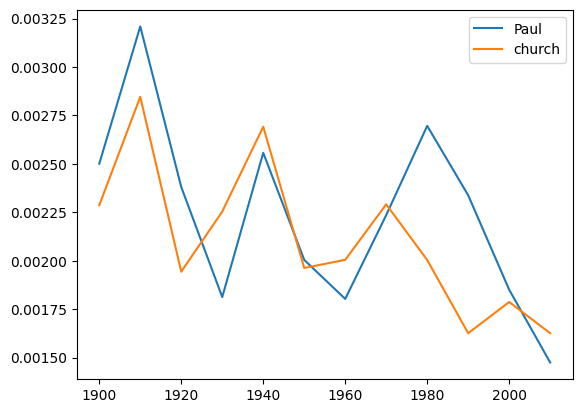

In [130]:
keywords_freqs_df[["Paul", "church"]].plot()

<Axes: >

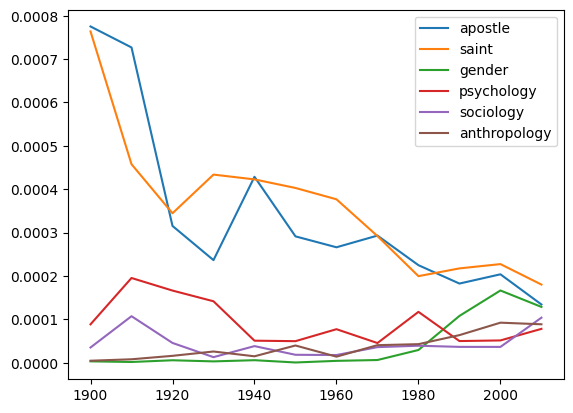

In [131]:
keywords_freqs_df[["apostle", "saint", "gender", "psychology", "sociology", "anthropology"]].plot()

<Axes: >

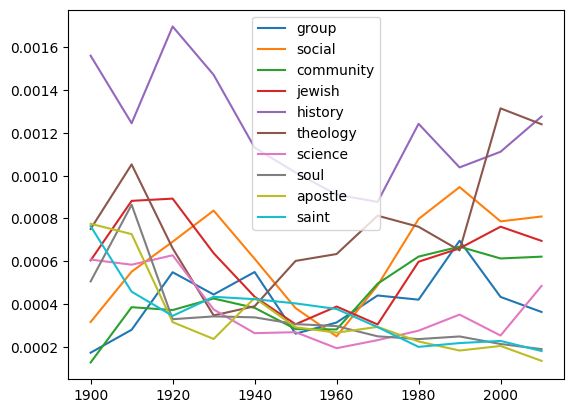

In [132]:
keywords_freqs_df[["group", "social", "community", "jewish", "history", "theology", "science", "soul", "apostle", "saint"]].plot()

<Axes: >

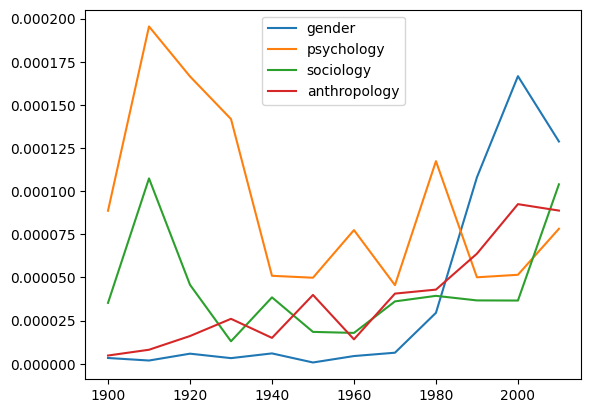

In [133]:
keywords_freqs_df[["gender", "psychology", "sociology", "anthropology"]].plot()